# Project 1

### Group number 24

### Classification 

The dataset which we're using for classification was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted having around 32000 rows and 15 columns.We have about 7 to 8 percent of incomplete data and categorical variables like Sex, Workclass, Race and few others. The prediction task is to determine whether a person makes over $50000 a year.

In [2]:
#Importing few packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
#import the dataset
classification_data = pd.DataFrame(pd.read_csv('Downloads//classification_data.csv'))

In [4]:
#Viewing the data
classification_data

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


## Data Preprocessing

 checking for missing data and apply data scaling

In [5]:
classification_data.info()
# we have total of 32561 rows and

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32444 non-null float64
Education         32458 non-null object
Education-num     32331 non-null float64
Marital-status    32356 non-null object
Occupation        32233 non-null object
Relationship      32462 non-null object
Race              32255 non-null object
Sex               32338 non-null object
Capital-gain      32306 non-null float64
Capital-loss      32453 non-null float64
hours-per-week    32451 non-null float64
native-country    32437 non-null object
Income            32561 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


In [6]:
#Data has null values in it
classification_data.isnull().sum()

Age                 0
Workclass           0
fnlwgt            117
Education         103
Education-num     230
Marital-status    205
Occupation        328
Relationship       99
Race              306
Sex               223
Capital-gain      255
Capital-loss      108
hours-per-week    110
native-country    124
Income              0
dtype: int64

In [7]:
classification_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [8]:
classification_data['Education'].value_counts()

 HS-grad         10459
 Some-college     7271
 Bachelors        5339
 Masters          1715
 Assoc-voc        1380
 11th             1173
 Assoc-acdm       1065
 10th              931
 7th-8th           643
 Prof-school       574
 9th               512
 12th              432
 Doctorate         412
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [9]:
classification_data['Marital-status'].value_counts()

 Married-civ-spouse       14895
 Never-married            10601
 Divorced                  4418
 Separated                 1018
 Widowed                    987
 Married-spouse-absent      414
 Married-AF-spouse           23
Name: Marital-status, dtype: int64

In [10]:
classification_data['Occupation'].value_counts()

 Prof-specialty       4100
 Craft-repair         4047
 Exec-managerial      4034
 Adm-clerical         3735
 Sales                3610
 Other-service        3261
 Machine-op-inspct    1978
 ?                    1828
 Transport-moving     1580
 Handlers-cleaners    1356
 Farming-fishing       985
 Tech-support          921
 Protective-serv       641
 Priv-house-serv       148
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
classification_data['Relationship'].value_counts()

 Husband           13148
 Not-in-family      8282
 Own-child          5053
 Unmarried          3436
 Wife               1565
 Other-relative      978
Name: Relationship, dtype: int64

In [12]:
classification_data['Race'].value_counts()

 White                 27556
 Black                  3103
 Asian-Pac-Islander     1024
 Amer-Indian-Eskimo      305
 Other                   267
Name: Race, dtype: int64

In [13]:
classification_data['Sex'].value_counts()

 Male      21644
 Female    10694
Name: Sex, dtype: int64

In [14]:
classification_data['native-country'].value_counts()

 United-States                 29053
 Mexico                          641
 ?                               583
 Philippines                     198
 Germany                         136
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            74
 Italy                            73
 Dominican-Republic               70
 Vietnam                          66
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
#adding the mean of the cloumn values in the null positions(for numeric values)
#fnlwgt is final weight which is very important variabale in our adult census dataset and it's positively corelated to the below 3 columns Race,age and sex.
#So we did group by to those 3 columns.
classification_data['fnlwgt'] = classification_data['fnlwgt'].fillna(classification_data.groupby(['Race','Age','Sex'])['fnlwgt'].transform('mean'))
#Capital-gain and capital loss are positively corelated to workclass and age. 
classification_data['Capital-gain'] = classification_data['Capital-gain'].fillna(classification_data.groupby(['Workclass'])['Capital-gain'].transform('mean'))
classification_data['Capital-loss'] = classification_data['Capital-loss'].fillna(classification_data.groupby(['Workclass','Age'])['Capital-loss'].transform('mean'))
#Education-num is strongly positively corelated to Education number 
classification_data['Education-num'] = classification_data['Education-num'].fillna(classification_data.groupby('Education')['Education-num'].transform('mean'))
#number of working hours in a week is dependent on the work class and the age(experience) of an employee.
classification_data['hours-per-week'] = classification_data['hours-per-week'].fillna(classification_data.groupby(['Workclass','Age'])['hours-per-week'].transform('mean'))


In [16]:
#Adding the mode of the column in the incomplete data of the catagorical variables
classification_data['Education'].fillna('HS-grad', inplace=True)
classification_data['Marital-status'].fillna('Married-civ-spouse', inplace=True)
classification_data['Occupation'].fillna('Prof-specialty', inplace=True)
classification_data['Relationship'].fillna('Husband', inplace=True)
classification_data['Race'].fillna('White', inplace=True)
classification_data['Sex'].fillna('Male', inplace=True)
classification_data['native-country'].fillna('United-States', inplace=True)

In [17]:
#now we can see that there are no null values
classification_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [18]:
classification_data

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [19]:
#create dummies
dummies = pd.get_dummies(classification_data.Workclass, prefix = 'Workclass')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')
dummies = pd.get_dummies(classification_data.Education, prefix = 'Education')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')
dummies = pd.get_dummies(classification_data['Marital-status'], prefix = 'Marital-status')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')
dummies = pd.get_dummies(classification_data.Occupation, prefix = 'Occupation')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')
dummies = pd.get_dummies(classification_data.Relationship, prefix = 'Relationship')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')
dummies = pd.get_dummies(classification_data.Race, prefix = 'Race')
classification_data = pd.concat([classification_data,dummies],axis = 'columns')



In [20]:
#setting up boolean values for the sex as it has only two values(male,Female)
le =LabelEncoder()
classification_data['Sex'] = le.fit_transform(classification_data['Sex'])

In [21]:
#Dropping the columns which comparatively are not much useful in predicting
classification_data.drop(columns=['Workclass', 'Education', 'Marital-status', 'Occupation','Relationship','native-country','Race'], inplace=True)

In [22]:
classification_data

,Age,fnlwgt,Education-num,Sex,Capital-gain,Capital-loss,hours-per-week,Income,Workclass_ ?,Workclass_ Federal-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_Husband,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Race_White
0,39,77516.0,13.0,1,2174.0,0.0,40.0,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311.0,13.0,1,0.0,0.0,13.0,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646.0,9.0,1,0.0,0.0,40.0,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,234721.0,7.0,1,0.0,0.0,40.0,<=50K,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409.0,13.0,0,0.0,0.0,40.0,<=50K,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302.0,12.0,0,0.0,0.0,38.0,<=50K,0,0,...,0,0,1,0,0,0,0,0,1,0
32557,40,154374.0,9.0,1,0.0,0.0,40.0,>50K,0,0,...,0,0,0,0,0,0,0,0,1,0
32558,58,151910.0,9.0,0,0.0,0.0,40.0,<=50K,0,0,...,0,1,0,0,0,0,0,0,1,0
32559,22,201490.0,9.0,1,0.0,0.0,20.0,<=50K,0,0,...,1,0,0,0,0,0,0,0,1,0


### Spliting the Data and standardizing

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [24]:
X = classification_data.drop(columns = 'Income')
y = classification_data['Income']

In [25]:
#splitting the data and standardizing the values
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train_org)
X_test = stdscaler.transform(X_test_org)



# Classification


# Knn Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()



In [27]:
grid_parameters = {'n_neighbors' : [3, 5, 11, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

gridsearch = GridSearchCV(KNeighborsClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)

In [28]:
gridsearch_fit = gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.5min finished


In [29]:
print("Best score for the model : ", gridsearch_fit.best_score_)
print("Best estimator for the model : ",gridsearch_fit.best_estimator_)
print("Best parameters for the model : ",gridsearch_fit.best_params_)

Best score for the model :  0.8305487305487306
Best estimator for the model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
Best parameters for the model :  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
grid_parameters = {'penalty': ['l1','l2'], 'C': [0.1,1,10,100,1000]} 

logistic_fit = GridSearchCV(logistic, grid_parameters, cv = 3)

In [32]:
gridsearchcv_fit = logistic_fit.fit(X_train, y_train)

c:\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

In [33]:
print("Best score : ", gridsearchcv_fit.best_score_)
print("Best estimator: ",gridsearchcv_fit.best_estimator_)
print("Best parameters: ",gridsearchcv_fit.best_params_)

Best score :  0.8518837018837019
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameters:  {'C': 0.1, 'penalty': 'l2'}


# Linear Support Vector Machine

In [34]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC()

In [35]:
param_values = {'C': [0.1,10,1000]} 

linearsvm_gridsearch = GridSearchCV(linearsvm, param_values, cv = 3)

In [36]:
linearsvm_gridsearch_fit = linearsvm_gridsearch.fit(X_train, y_train)

c:\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear f

In [37]:
print("Best score : ", linearsvm_gridsearch_fit.best_score_)
print("Best estimator: ",linearsvm_gridsearch_fit.best_estimator_)
print("Best parameters: ",linearsvm_gridsearch_fit.best_params_)

Best score :  0.8504914004914005
Best estimator:  LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best parameters:  {'C': 0.1}


### Kernelized Support Vector Machine (rbf, poly, and linear)

In [38]:
from sklearn.svm import SVC
kernelsvc = SVC()

In [39]:
parameters = {'kernel': ['rbf','linear','poly'], 'C' : [0.1, 1]}
               
kernel_svm = GridSearchCV(kernelsvc, parameters, cv = 3)
kernel_svmfit = kernel_svm.fit(X_train, y_train)

In [40]:
kernel_svmfit = kernel_svm.fit(X_train, y_train)

In [41]:
print("Best score : ", kernel_svmfit.best_score_)
print("Best estimator: ",kernel_svmfit.best_estimator_)
print("Best parameters: ",kernel_svmfit.best_params_)

Best score :  0.8505323505323505
Best estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters:  {'C': 0.1, 'kernel': 'linear'}


### Decision Tree

In [42]:
from sklearn import tree
decisiontree = tree.DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
param = {'criterion':['gini','entropy'], 'max_depth': range(2,20)}
decisiontree_gs = GridSearchCV(tree.DecisionTreeClassifier(), param, cv = 2)

In [44]:
decisiontree_gs_fit = decisiontree_gs.fit(X_train, y_train)

In [45]:
print("Best score : ", decisiontree_gs_fit.best_score_)
print("Best estimator: ",decisiontree_gs_fit.best_estimator_)
print("Best parameters: ",decisiontree_gs_fit.best_params_)

Best score :  0.8528255528255528
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best parameters:  {'criterion': 'gini', 'max_depth': 6}


# Conclusion: Selection of the best model
 We can see that the Best score for the Decision tree classification is highest when compared to all the other classifications.
 Generally we consider the model which has the best score as the best model. So we can consider that Decision Tree model is recommended for this data set for classification.

### Regression

The dataset which we're using for classification was extracted from the kaggle. A set of reasonably clean records was extracted having around 22000 rows and 21 columns.We have about 7 to 8 percent of incomplete data and ordinal variables like floors, bedrooms, waterfront and few others. The prediction task is to determine pricing for the houses.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR

In [47]:
df= pd.read_csv("Downloads//kc_house_data.csv")
df.head()
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21512.000000,21511.000000,2.150700e+04,21509.000000,21392.000000,21354.000000,21106.000000,21510.000000,21511.000000,21506.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21587.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.115006,2079.511878,1.510182e+04,1.494514,0.007573,0.233961,3.409078,7.655927,1787.957696,291.698363,1970.877481,84.402258,98077.939805,47.560053,-122.213896,1986.788299,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770475,918.489970,4.145519e+04,0.539725,0.086694,0.766004,0.650989,1.175646,827.982649,442.480726,29.475919,401.679240,53.505026,0.138564,0.140828,685.422463,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21512 non-null float64
sqft_living      21511 non-null float64
sqft_lot         21507 non-null float64
floors           21509 non-null float64
waterfront       21392 non-null float64
view             21354 non-null float64
condition        21106 non-null float64
grade            21510 non-null float64
sqft_above       21511 non-null float64
sqft_basement    21506 non-null float64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21587 non-null float64
sqft_lot15       21613 non-null int64
dtypes: float64(14), int64(6), object(1)
memory usage: 3.5+ MB


In [49]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        101
sqft_living      102
sqft_lot         106
floors           104
waterfront       221
view             259
condition        507
grade            103
sqft_above       102
sqft_basement    107
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15     26
sqft_lot15         0
dtype: int64

In [50]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [51]:
df['bathrooms'].value_counts()

2.50    5355
1.00    3832
1.75    3030
2.25    2036
2.00    1921
1.50    1443
2.75    1180
3.00     750
3.50     725
3.25     588
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [52]:
df['floors'].value_counts()

1.0    10620
2.0     8209
1.5     1904
3.0      607
2.5      161
3.5        8
Name: floors, dtype: int64

In [53]:
df['waterfront'].value_counts()

0.0    21230
1.0      162
Name: waterfront, dtype: int64

In [54]:
df['view'].value_counts()

0.0    19259
2.0      949
3.0      502
1.0      328
4.0      316
Name: view, dtype: int64

In [55]:
df['condition'].value_counts()

3.0    13715
4.0     5530
5.0     1665
2.0      166
1.0       30
Name: condition, dtype: int64

In [56]:
df['grade'].value_counts()

7.0     8939
8.0     6035
9.0     2604
6.0     2033
10.0    1124
11.0     397
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: grade, dtype: int64

In [57]:
#adding the mean of the cloumn values in the null positions(for numeric continuous values)
#squarefeet15 built is  in our KN housing dataset and it's corelated to the year in which it was built.
df['sqft_living15'] = df['sqft_living15'].fillna(df.groupby(['yr_built'])['sqft_living15'].transform('mean'))
#similarly for other columns.
df['sqft_lot'] = df['sqft_lot'].fillna(df.groupby(['yr_built'])['sqft_lot'].transform('mean'))
df['sqft_living'] = df['sqft_living'].fillna(df.groupby(['yr_built'])['sqft_living'].transform('mean'))
df['sqft_above'] = df['sqft_above'].fillna(df.groupby(['yr_built'])['sqft_above'].transform('mean'))
df['sqft_basement'] = df['sqft_basement'].fillna(df.groupby(['yr_built'])['sqft_basement'].transform('mean'))
df['waterfront'] = df['waterfront'].fillna(df.groupby(['yr_built'])['waterfront'].transform('mean'))

                                                 

In [58]:
#Adding the mode of the column in the incomplete data of the catagorical variables
df['bathrooms'].fillna('2.50', inplace=True)
df['floors'].fillna('1', inplace=True)
df['view'].fillna('0', inplace=True)
df['condition'].fillna('3', inplace=True)
df['grade'].fillna('7', inplace=True)

In [59]:
#No need to create dummies as all the data is numeric

In [60]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
df
#now we dont have any missing data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180.0,5650.0,1,0.0,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2,0.0,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1,770.0,10000.0,1,0.0,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3,1960.0,5000.0,1,0.0,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2,1680.0,8080.0,1,0.0,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.5,1530.0,1131.0,3,0.0,0,...,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509
21609,6600060120,20150223T000000,400000.0,4,2.5,2310.0,5813.0,2,0.0,0,...,8,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350.0,2,0.0,0,...,7,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007
21611,291310100,20150116T000000,400000.0,3,2.5,1600.0,2388.0,2,0.0,0,...,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287


In [62]:
df =  df.fillna(method='ffill').fillna(method='bfill')
#This works (propagation in both directions) #

In [63]:
X1=df[['id',
'bedrooms',
'bathrooms',
'sqft_living',
'sqft_lot',
'floors',
'waterfront',
'view',
'condition',
'grade',
'sqft_above',
'sqft_basement',
'yr_built',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15'
]]
y1=df['price']

In [64]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X1, y1, shuffle = True)

In [65]:
X=sample_data
y=sample_target

In [66]:
X.shape


(5404, 19)

### Scaling

Justification of type of scaling used
In the next step we have to rescale data. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables. We used MinMax scaler function from the Scikit Learn preprocessing package. We used MinMaxScaler to scale the data. As we know, StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different. StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0,1].Based on the Histograms above, outliers are present in this dataset. So it's better to use MinMaxScaler for this dataset.

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [69]:
Labels=np.array(y_train)
Features=np.array(X_train)

In [70]:
X.describe()

,id,bedrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.404000e+03,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,4.540266e+09,3.360104,2075.244090,14419.063459,0.007875,1788.982139,286.162319,1970.573834,94.520355,98077.497409,47.561349,-122.211613,1986.659942,12777.229645
std,2.874049e+09,0.894514,929.199951,32546.719449,0.087825,838.371586,438.472420,29.709574,423.914088,53.515396,0.137949,0.142547,686.862571,26379.338812
min,1.200021e+06,0.000000,380.000000,600.000000,0.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.164700,-122.512000,460.000000,659.000000
25%,2.026057e+09,3.000000,1410.000000,5058.500000,0.000000,1190.000000,0.000000,1951.000000,0.000000,98032.000000,47.475150,-122.327000,1480.000000,5119.500000
50%,3.885803e+09,3.000000,1900.000000,7642.500000,0.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.572800,-122.229000,1840.000000,7671.500000
75%,7.297780e+09,4.000000,2540.000000,10800.000000,0.000000,2230.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.121000,2370.000000,10200.500000
max,9.895000e+09,11.000000,13540.000000,641203.000000,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,6210.000000,438213.000000


# K Neighbors Regressor


Text(0, 0.5, 'MSE')

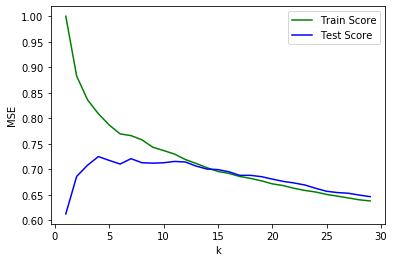

In [71]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,30):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,30)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

### K Neighbors Regressor Evaluation
Finding evaluation performance metrics for K Neighbors Regressor using k=18.
In the codes below, we calculated performance metrics once manualy and once using the functions.

In [72]:
knn_reg = KNeighborsRegressor(18) 
knn_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)

    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = knn_reg.predict(X_test) 
print_metrics(y_test, y_score,56)

Mean Square Error      = 40908505078.07808
Root Mean Square Error = 202258.5105207642
Mean Absolute Error    = 103616.71704087507
Median Absolute Error  = 57638.888888888876
R^2                    = 0.6879830753939871
Adjusted R^2           = 0.674731391337361


Performing cross validation to find better R squared and other performance .

In [73]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
knn_reg = KNeighborsRegressor() 
knn_reg.fit(X_train, y_train)
knnscores = ms.cross_validate(knn_reg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(knnscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.695        -32350596030.023      0.698
Fold  2    0.625        -63622311319.964      0.627
Fold  3    0.725        -29488980436.468      0.727
Fold  4    0.641        -53696352660.985      0.650
Fold  5    0.649        -54062607631.826      0.652
----------------------------------------
Mean       0.667        -46644169615.853      0.671
Std        0.037        13353880077.773      0.036


R-squared is a statistical measure of how close the data are to the fitted regression line. To evaluate the overall fit of a KN Regressor model, we use the R-squared value.The threshold for a good R-squared value depends widely on the domain, so we can compare R-square for all the regression models to decide which model better fits the data.
Performing KN regression gives us an R squared of 0.673 which is good in general. However the value of MSE is large.

### K Neighbors Regressor Grid-Search with Cross Validation

In [74]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")
knnScoring =  'r2'
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"n_neighbors":[1,2,3,4,5,6,7,8,9]}
## Define the SVM model
knn_clf = KNeighborsRegressor()

## Perform the grid search over the parameters
scoring=knnScoring
clf = ms.GridSearchCV(estimator = knn_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = knnScoring,
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.n_neighbors)
#print(clf.best_estimator_.penalty)

6


In [75]:
#As we also observed in the graph above, Best parameter for k is 3 using grid search with cross validation as well.

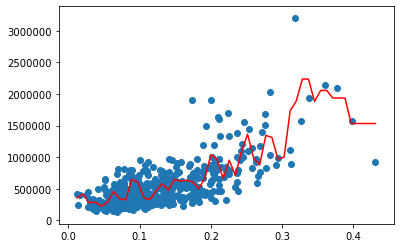

In [76]:
X_b = X_train[:500,3].reshape(-1,1)
y_b = y_train[:500]

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

In [77]:
y_knr_predict = clf.predict(X_test)
y_knr_train_predict = clf.predict(X_train)
report_table=0
report_table1 = [['knr', 'k = 4', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test,y_knr_predict)]]
report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145


# Linear regression using the Normal Equation
Getting test and train scores without performing cross validation

In [78]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.6959831563844019
0.7032627938204103


Text(0.5, 0, 'RM')

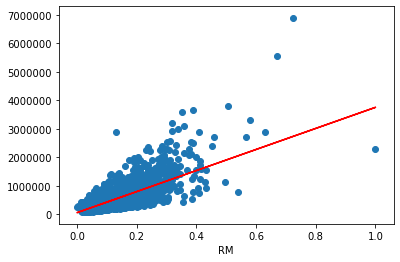

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,3].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [80]:
#the graph shows the fiiting line and how Linear Regressor is going to fit in the data

In [81]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)


print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ -26084.98909422 -635787.51761293  484409.47902235  504867.95811408
  -46410.81314521   -3523.48768364  386212.66680461  232934.07194502
   16818.56994432  787350.95992285 1503095.79702695  482480.01981562
 -334261.76868033   22437.07144911 -155026.85499377  343737.75696857
 -376575.55934512  135275.62824331  -23832.22391213]


Linear regression Evaluation
We will now use the test dataset to evaluate the performance of the regression model.The code in the cell below compute and display various performance metrics and examine the results. 

In [82]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 39494695251.7111
Root Mean Square Error = 198732.72315275887
Mean Absolute Error    = 128042.85277151449
Median Absolute Error  = 92377.64792404836
R^2                    = 0.6987664710022802
Adjusted R^2           = 0.68079649596003


In [83]:
#The RMSE, MAE and median absolute error are all large. However, the R2 and R2adj are rather different. 
#This model has a large number of parameters compared to the number of cases available. 
#This result indicates that the model may be overfit and might not generalize well.
#MSE is slightly than the MSE of KN regression.

In [85]:
# Linear regression Cross Validation
#We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [86]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#sgd_reg.fit(X_train, y_train)
#logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55}) 
lregscores = ms.cross_validate(lreg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

In [87]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(lregscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.718        -29860896175.749      0.719
Fold  2    0.684        -53604900011.970      0.684
Fold  3    0.649        -37635902448.748      0.650
Fold  4    0.693        -45948794319.091      0.693
Fold  5    0.684        -48674505496.805      0.684
----------------------------------------
Mean       0.686        -43144999690.472      0.686
Std        0.022        8422158537.169      0.022


In [88]:
y_lreg_predict = lreg.predict(X_test)
y_lreg_train_predict = lreg.predict(X_train)
report_table2 = report_table1 + [['Linear reg', '-', lreg.score(X_train, y_train), lreg.score(X_test, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table2,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263


#here test accuracy increased by 2% when compared with Knr

# SGD Regressor

In [89]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

0.24752909089723363
0.4442884597308073


In [90]:
print(sgd_reg.coef_)
print(sgd_reg.intercept_)
print(sgd_reg.n_iter_)
sgd_reg.score

[-1.72526640e+04 -4.01370762e+05  6.02854529e+05 -3.45340499e+07
  4.74340042e+04  2.25065108e+04  4.26431816e+05  1.92620171e+05
  5.58172947e+04  1.16544046e+06  2.50052324e+07  1.13090342e+07
 -3.58974577e+05 -1.11625477e+04 -1.09703022e+05  3.46109699e+05
 -2.37339262e+05  1.76820026e+05 -1.35318679e+04]
[-270980.06193576]
2269


<bound method RegressorMixin.score of SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)>

# SGD Regressor Evaluation
We will now use the test dataset to evaluate the performance of the SGD model.The code in the cell below compute and display various performance metrics and examine the results. 

In [91]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = sgd_reg.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 72859279655.27663
Root Mean Square Error = 269924.5814209529
Mean Absolute Error    = 146986.4396181421
Median Absolute Error  = 90381.24831565935
R^2                    = 0.44428845973080733
Adjusted R^2           = 0.4111376928073704


# SGD Regressor Grid Search with Cross Validation
#Performing grid search to find the best parameters for penalty and maximum number of iterations.

In [92]:
#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")

sgdScoring =  'r2'
sgd_reg = SGDRegressor(random_state= 0, learning_rate = 'optimal')
sgd_reg.fit(X_train, y_train)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_iter":[1000,10000], "penalty":['l1','l2']}
## Define the SVM model
sgd_clf = SGDRegressor(random_state=0, learning_rate = 'optimal')

## Perform the grid search over the parameters
scoring=sgdScoring
clf = ms.GridSearchCV(estimator = sgd_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.max_iter)
print(clf.best_estimator_.penalty)

10000
l2


Performing Grid search with cross validation, we can see that L2 is a better option for penalty and 10000 is the optimized maximum iteration to use.

# SGD Regressor Cross Validation
We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [93]:
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
sgd_reg = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
scores = ms.cross_validate(sgd_reg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(scores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    -99.676        -10679045156963.332      -99.175
Fold  2    -2.550        -602218827923.318      -2.548
Fold  3    -174.622        -18855561389165.535      -174.411
Fold  4    -8.484        -1419233409270.105      -8.480
Fold  5    -45.980        -7239079697978.005      -45.956
----------------------------------------
Mean       -66.263        -7759027696260.060      -66.114
Std        64.292        6683454386300.095      64.171


In [94]:
y_sgdreg_predict = sgd_reg.predict(X_test)
y_sgdreg_train_predict = sgd_reg.predict(X_train)
report_table3 =report_table2 + [['SGD reg', 'max_iter=10000, penalty=L2', sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test), sklm.r2_score(y_test,y_sgdreg_predict)]]
report = pd.DataFrame(report_table3,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724


# Polynomial Model

The graph below shows the scatter plot of the train set

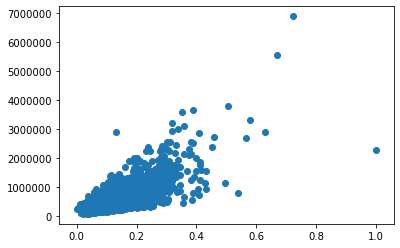

In [95]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [96]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [97]:
print(train_score_list)
print(test_score_list)

[0.6959831563844018, 0.8500116101636496]
[0.7032627938204106, 0.7867125256440308]


Plotting the list of train and test scores

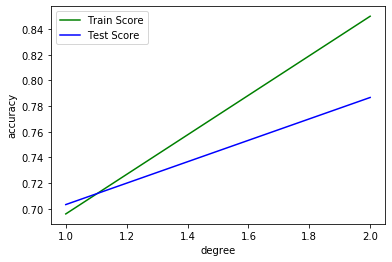

In [98]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

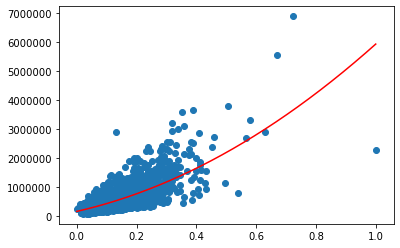

In [99]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,1000).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# Polynomial Cross Validation
We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [100]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
polyscores = ms.cross_validate(lreg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(polyscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.718        -29860896175.749      0.719
Fold  2    0.684        -53604900011.970      0.684
Fold  3    0.649        -37635902448.748      0.650
Fold  4    0.693        -45948794319.091      0.693
Fold  5    0.684        -48674505496.805      0.684
----------------------------------------
Mean       0.686        -43144999690.472      0.686
Std        0.022        8422158537.169      0.022


By Performing cross validation on polynomial model, we get a r squared of 0.69. This r square is better than kn regressor and almost same as Linear regressor. MSE is also lower that KN regressor but the same as Linear model.

In [101]:
report_table4 =report_table3 + [['Polynomial', '-', lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table4,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724
3,Polynomial,-,0.850012,0.786713,0.703263


# Ridge Model

The graph below shows the result of performing Ridge model using different values of alpha.

In [102]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

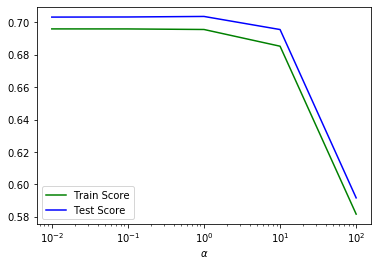

In [103]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

at alpha=0.01, both train and test score are high but as alpha increases, the scores decreases. So we choose alpha as 0.01 or any value before 1should give the same results as both the values are constant

In [104]:
print(train_score_list)
print(test_score_list)

[0.6959826565693903, 0.6959623193018223, 0.6956220258947023, 0.6852955526142271, 0.5816386546275684]
[0.7032726128690823, 0.7033423010109596, 0.7036741936081082, 0.6955898395686335, 0.5916703933402975]


In [105]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6960
Test score: 0.7033


In [106]:
ridge = Ridge(alpha = 0.001) #just checking for alpha =0.001
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6960
Test score: 0.7033


In [107]:
print(ridge.coef_)
print(ridge.intercept_)

[ -14204.38962357 -499260.69051864  492798.00899156  356277.06306226
  -17256.81043534  -20937.97174366  392382.82408663  229531.06630625
   97008.36153683  910698.66073665 1458390.5210937   456297.45810605
 -296332.56188706   41638.68779878 -111782.24292248  367191.71661153
 -305426.04017917  129502.29216586  -11915.68376717]
-198661.29654862522


# Ridge Evaluation
We will now use the test dataset to evaluate the performance of the Ridge model.The code in the cell below compute and display various performance metrics and examine the results. 

In [108]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train) 

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_ridge = ridge.predict(X_test) 
print_metrics(y_test, y_score_ridge, 77)    

Mean Square Error      = 38905048818.27696
Root Mean Square Error = 197243.62808029304
Mean Absolute Error    = 125660.16851051175
Median Absolute Error  = 89257.78284852521
R^2                    = 0.7032638161488183
Adjusted R^2           = 0.6855621285721387


# Ridge Grid Search with Cross Validation
We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [109]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
#Labels= Labels.reshape(Labels.shape[0],)
ridgeScoring = 'r2'
ridge = Ridge()
ridge.fit(X_train,y_train) 
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
## Define the SVM model
Ridge_clf = Ridge(random_state=0)

## Perform the grid search over the parameters
scoring=ridgeScoring
clf = ms.GridSearchCV(estimator = Ridge_clf, param_grid = param_grid, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best alpha
print(clf.best_estimator_.alpha)

0.02


In [110]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train) 
Ridgescores = ms.cross_validate(ridge, Features, Labels, scoring=scoring,
                         return_train_score=False)


def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(Ridgescores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.718        -29860005366.142      0.719
Fold  2    0.684        -53605243417.498      0.684
Fold  3    0.650        -37625175539.784      0.650
Fold  4    0.693        -45948672557.157      0.693
Fold  5    0.684        -48660637211.988      0.684
----------------------------------------
Mean       0.686        -43139946818.514      0.686
Std        0.022        8422101196.677      0.022


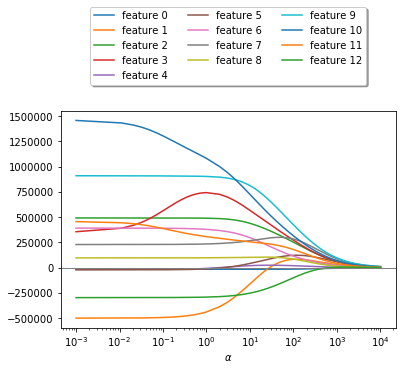

In [111]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [112]:
y_ridge_predict = ridge.predict(X_test)
y_ridge_train_predict = ridge.predict(X_train)
report_table5 =report_table4 + [['Ridge', 'alpha=0.01', ridge.score(X_train, y_train), ridge.score(X_test, y_test), sklm.r2_score(y_test, y_score_ridge)]]
report = pd.DataFrame(report_table5,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724
3,Polynomial,-,0.850012,0.786713,0.703263
4,Ridge,alpha=0.01,0.028603,0.028847,0.703264


# LASSO

In [113]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

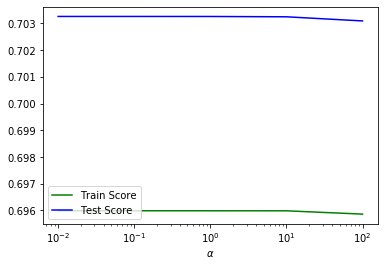

In [114]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

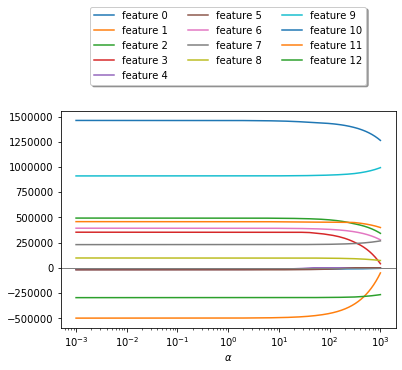

In [115]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso Model Evaluation
We will now use the test dataset to evaluate the performance of the Lasso model.The code in the cell below compute and display various performance metrics and examine the results. 

In [116]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_lasso = lasso.predict(X_test) 
print_metrics(y_test, y_score_lasso, 77)    

Mean Square Error      = 38905184442.51439
Root Mean Square Error = 197243.9718787735
Mean Absolute Error    = 125660.90381906077
Median Absolute Error  = 89263.75103851152
R^2                    = 0.7032627817170447
Adjusted R^2           = 0.6855610324317193


# Lasso Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [117]:
#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")

lassoScoring =  'r2'
lasso = Lasso()
lasso.fit(X_train,y_train)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
## Define the SVM model
Lasso_clf = Lasso(random_state=0)

## Perform the grid search over the parameters
scoring=lassoScoring
clf = ms.GridSearchCV(estimator = Lasso_clf, param_grid = param_grid, 
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#Best alpha
print(clf.best_estimator_.alpha)


0.02


# Lasso Model Cross Validation

In [118]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lassoscores = ms.cross_validate(lasso, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(lassoscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.718        -29860884675.890      0.719
Fold  2    0.684        -53604899411.824      0.684
Fold  3    0.649        -37636509823.713      0.650
Fold  4    0.693        -45948794706.645      0.693
Fold  5    0.684        -48673361827.495      0.684
----------------------------------------
Mean       0.686        -43144890089.114      0.686
Std        0.022        8421932425.095      0.022


In [119]:
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20417,9265880040,4,2.5,2840.0,4500.0,2,0.0,0,3,8,2840.0,0.0,2012,0,98028,47.7678,-122.237,2840.0,4939
10420,2424059116,3,2.25,3440.0,44374.0,2,0.0,3,4,10,2190.0,1250.0,1979,0,98006,47.5470,-122.111,3470.0,40185
14435,455000841,2,1,870.0,7975.0,1,0.0,2,3,7,870.0,0.0,1946,0,98107,47.6698,-122.361,1080.0,5722
9668,4039700090,3,2.5,2350.0,9648.0,1,0.0,0,4,9,2350.0,0.0,1966,0,98008,47.6156,-122.108,2320.0,10512
15123,1121000095,2,1,1120.0,5329.0,1,0.0,1,3,6,750.0,370.0,1929,0,98126,47.5421,-122.378,1530.0,5330


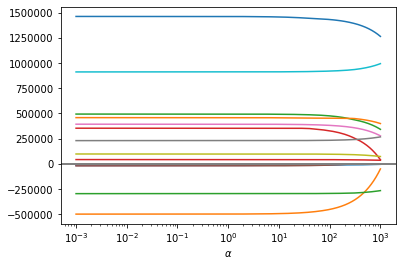

In [120]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,14):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=99999, linewidth=2, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
#plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.5),
 #        ncol=3, fancybox=True, shadow=True)
plt.show()

In [121]:
y_lasso_predict = lasso.predict(X_test)
y_lasso_train_predict = lasso.predict(X_train)
report_table6 =report_table5 + [['Lasso', 'alpha=0.01', lasso.score(X_train, y_train), lasso.score(X_test, y_test), sklm.r2_score(y_test, y_score_lasso)]]
report = pd.DataFrame(report_table6,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724
3,Polynomial,-,0.850012,0.786713,0.703263
4,Ridge,alpha=0.01,0.028603,0.028847,0.703264
5,Lasso,alpha=0.01,0.685653,0.692725,0.703263


# Linear SVM Model¶

In [122]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, random_state=0)
lin_SVR = LinearSVR(random_state=0, tol=0.005, C=1000, epsilon=0.01)
lin_SVR.fit(X_train, y_train)

LinearSVR(C=1000, dual=True, epsilon=0.01, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=0.005, verbose=0)

In [123]:
print(lin_SVR.coef_)
print(lin_SVR.intercept_)

[  5751.25640863  63792.87995859 110685.80606774 109947.66224791
  19961.91711327 105514.76431103  25129.91878048 125987.99731184
  52956.40810352 209346.75196672 124818.40385502  75391.81881814
 -29815.80029873  40058.41747611  -1099.35993089 253055.217403
  19887.25840193 187079.90426709  19753.77773422]
[20573.24987181]


Linear SVM Model Evaluation
We will now use the test dataset to evaluate the performance of the Linear SVM model.The code in the cell below compute and display various performance metrics and examine the results. 

In [124]:
lin_SVR = LinearSVR(tol=0.005)
lin_SVR.fit(X_train, y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_linsvm = lin_SVR.predict(X_test) 
print_metrics(y_test, y_score_linsvm, 77)    

Mean Square Error      = 402292913355.8649
Root Mean Square Error = 634265.6488852797
Mean Absolute Error    = 521195.49059105146
Median Absolute Error  = 436092.43459859164
R^2                    = -2.0683643261106273
Adjusted R^2           = -2.251406468013616


# Linear SVM Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [125]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid  = {"C": [ 10, 100, 1000], 'epsilon':[0.01,0.1,1,10]}
## Define the SVM model
svc_clf = LinearSVR(random_state=0, tol=0.005)

## Perform the grid search over the parameters
scoring=LinearSVR.score
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best c and epsilon parameters
print(clf.best_estimator_.C)
print(clf.best_estimator_.epsilon)

1000
10


# Linear SVM Model Cross Validation

Using the optimized hyper parameters to get the performance metrics again using cross validation.

In [126]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lin_SVR = LinearSVR()
lin_SVR.fit(X_train, y_train)
SVRscores = ms.cross_validate(lin_SVR, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(SVRscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    -2.509        -372228839552.074      0.003
Fold  2    -1.682        -454922783615.187      0.003
Fold  3    -2.563        -382485073211.013      0.003
Fold  4    -2.025        -452651369652.116      0.003
Fold  5    -1.779        -428161157713.388      0.003
----------------------------------------
Mean       -2.111        -418089844748.755      0.003
Std        0.365        34708867131.960      0.000


In [127]:
y_linearsvm_predict = clf.predict(X_test)
y_linearsvm_train_predict = clf.predict(X_train)
report_table7 =report_table6 + [['Linear SVM', 'C=1000, gamma=10', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test, y_score_linsvm)]]
report = pd.DataFrame(report_table7,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724
3,Polynomial,-,0.850012,0.786713,0.703263
4,Ridge,alpha=0.01,0.028603,0.028847,0.703264
5,Lasso,alpha=0.01,0.685653,0.692725,0.703263
6,Linear SVM,"C=1000, gamma=10",0.335299,0.343714,-2.068364


# SVM Model with kernel

In [128]:
nr.seed(1115)
ker_SVR = SVR(C=1000, gamma=10, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train) 

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=10, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# SVM Model with kernel Evaluation
We will now use the test dataset to evaluate the performance of the kernelized SVM model.The code in the cell below compute and display various performance metrics and examine the results. 

In [129]:
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train) 
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_kersvm = ker_SVR.predict(X_test) 
print_metrics(y_test, y_score_kersvm, 77)    

Mean Square Error      = 134319045956.94551
Root Mean Square Error = 366495.62883743306
Mean Absolute Error    = 214788.6612720202
Median Absolute Error  = 147855.95946683956
R^2                    = -0.024476830808426664
Adjusted R^2           = -0.08559161820359185


# Kernel SVM Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results. We have 3 parameters to optimize: C, gamma and epsilon.

In [130]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0], 'epsilon':[0.01,0.1,1,10]}
## Define the SVM model
svc_clf = SVR(kernel='rbf') 

## Perform the grid search over the parameters
scoring=SVR.score
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best parameters for C, gamma and epsilon
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)
print(clf.best_estimator_.epsilon)
#Best parameters for C, gamma and epsilon are 1000, 0.02 and 10 respectively.

1000
0.02
10


# SVM Model with kernel Cross Validation

Using the optimized hyper parameters to get the performance metrics again using cross validation.

In [131]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=0.01, kernel='rbf')
ker_SVR.fit(X_train, y_train)
kerSVRscores = ms.cross_validate(ker_SVR, Features, Labels, scoring=scoring,
                         return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(kerSVRscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    -0.027        -108943114614.782      0.023
Fold  2    -0.033        -175166884812.582      0.018
Fold  3    -0.041        -111772789931.333      0.021
Fold  4    -0.060        -158668129896.373      0.019
Fold  5    -0.020        -157114562670.850      0.018
----------------------------------------
Mean       -0.036        -142333096385.184      0.020
Std        0.014        26878266093.787      0.002


In [132]:
y_linearsvm_predict = clf.predict(X_test)
y_linearsvm_train_predict = clf.predict(X_train)
report_table8 =report_table7 + [['Kernel SVM', 'C=1000, gamma=0.02, epsilon=0.01', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test, y_score_kersvm)]]
report = pd.DataFrame(report_table8,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 4,0.769176,0.710145,0.710145
1,Linear reg,-,0.695983,0.703263,0.703263
2,SGD reg,"max_iter=10000, penalty=L2",-3.300990,-1.595724,-1.595724
3,Polynomial,-,0.850012,0.786713,0.703263
4,Ridge,alpha=0.01,0.028603,0.028847,0.703264
5,Lasso,alpha=0.01,0.685653,0.692725,0.703263
6,Linear SVM,"C=1000, gamma=10",0.335299,0.343714,-2.068364
7,Kernel SVM,"C=1000, gamma=0.02, epsilon=0.01",-0.030175,-0.024477,-0.024477


# Conclusion: Selection of the best model

Here the best model is polynomial with the best training and test accuracy. The Linear SVM and Kernel SVM models R2 is irrevalent and the last two model doesn't hold water. Here the model's prediction is low in first one and irrevalent in the second one. Overall polynomial model predicts high when compared with other models.